# Job Salary Prediction

Author: Yiyun Mao

In [1]:
import pandas as pd
import numpy as np

## Step 1: Data Preparation

In [2]:
# read raw data from csv files
train_data = pd.read_csv("train.csv")
valid_data = pd.read_csv("valid.csv")
test_data = pd.read_csv("test.csv")

In [3]:
# read embeddings and TFIDF data from npy files
train_embs = np.load("train-embeddings.npy")
train_tfidf = np.load("train-tfidf.npy")

valid_embs = np.load("valid-embeddings.npy")
valid_tfidf = np.load("valid-tfidf.npy")

test_embs = np.load("test-embeddings.npy")
test_tfidf = np.load("test-tfidf.npy")

In [4]:
# seperate labelled and unlabelled training data
train_labelled_data = train_data.iloc[:8000, :]
train_labelled_embs = train_embs[:8000, :]
train_labelled_tfidf = train_tfidf[:8000, :]

train_unlabelled_data = train_data.iloc[8000:, :]
train_unlabelled_embs = train_embs[8000:, :]
train_unlabelled_tfidf = train_tfidf[8000:, :]

In [5]:
# generate new data (embedding + tfidf)
train_labelled_embs_tfidf = np.concatenate((train_labelled_embs, train_labelled_tfidf), axis=1)
train_unlabelled_embs_tfidf = np.concatenate((train_unlabelled_embs, train_unlabelled_tfidf), axis=1)
valid_embs_tfidf = np.concatenate((valid_embs, valid_tfidf), axis=1)
test_embs_tfidf = np.concatenate((test_embs, test_tfidf), axis=1)

In [6]:
# get labels from training dataset and validation dataset
train_bin_label = train_data.iloc[:8000, 2]
train_salary_label = train_data.iloc[:8000, 3]

valid_bin_label = valid_data.iloc[:, 2]
valid_salary_label = valid_data.iloc[:, 3]

In [7]:
from sklearn.preprocessing import MinMaxScaler
# transfer embedding data into non-negative
scaler = MinMaxScaler()
train_labelled_embs_pos = scaler.fit_transform(train_labelled_embs)
train_unlabelled_embs_pos = scaler.fit_transform(train_unlabelled_embs)
valid_embs_pos = scaler.fit_transform(valid_embs)
test_embs_pos = scaler.fit_transform(test_embs)

# generate new data (embedding pos + tfidf)
train_labelled_embs_pos_tfidf = np.concatenate((train_labelled_embs_pos, train_labelled_tfidf), axis=1)
train_unlabelled_embs_pos_tfidf = np.concatenate((train_unlabelled_embs_pos, train_unlabelled_tfidf), axis=1)
valid_embs_pos_tfidf = np.concatenate((valid_embs_pos, valid_tfidf), axis=1)
test_embs_pos_tfidf = np.concatenate((test_embs_pos, test_tfidf), axis=1)

## Step 2: Data Observation & Analytics

,salary_bin
9.0,889
6.0,867
3.0,865
4.0,831
2.0,808
0.0,801
1.0,779
8.0,763
7.0,756
5.0,641


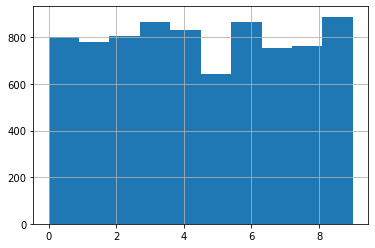

In [8]:
# number of instances in different class in training set
train_bin_label.hist()
data = train_bin_label.value_counts()
pd.DataFrame(data)

4    201
3    190
2    181
0    180
6    178
9    173
8    171
7    171
5    150
1    142
Name: salary_bin, dtype: int64

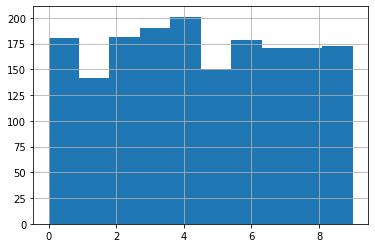

In [9]:
# number of instances in different class in development set
valid_bin_label.hist()
valid_bin_label.value_counts()

In [10]:
# helper function:
# get upper salary boundary of each bin from data set
def get_salary_upper_boundary(bin_label, salary_label):
    upper_boundary = {}
    for i, j in zip(bin_label, salary_label):
        if (j > upper_boundary.get(i, 0)):
            upper_boundary[i] = j
    upper_boundary = dict(sorted(upper_boundary.items()))
    return upper_boundary
# get salary bin based on mean salary
def get_salary_bin(mean_salary):
    pass

In [11]:
# calculate salary boundary in train set and validation set
train_upper_boundary = get_salary_upper_boundary(train_bin_label, train_salary_label)
valid_uppper_boundary = get_salary_upper_boundary(valid_bin_label, valid_salary_label)

In [12]:
# note: 不同bin，预测难度不同
train_upper_boundary

{0.0: 2200.0,
 1.0: 2650.0,
 2.0: 3150.0,
 3.0: 3750.0,
 4.0: 4500.0,
 5.0: 5250.0,
 6.0: 6250.0,
 7.0: 7250.0,
 8.0: 9200.0,
 9.0: 65000.0}

In [13]:
df_boundary = pd.DataFrame({'salary_bin': list(train_upper_boundary.keys()), 'upper boundary of salary value': list(train_upper_boundary.values())})
df_boundary

,salary_bin,upper boundary of salary value
0,0.0,2200.0
1,1.0,2650.0
2,2.0,3150.0
3,3.0,3750.0
4,4.0,4500.0
5,5.0,5250.0
6,6.0,6250.0
7,7.0,7250.0
8,8.0,9200.0
9,9.0,65000.0


## Step 3: Baseline Modelling: Zero-R & Random

### Part 1: Zero-R

In [14]:
import time
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

#### Feature 1: Embedding

In [15]:
# Zero R model
zeroR_model = DummyClassifier(strategy="most_frequent")

# train the model
zeroR_model.fit(train_labelled_embs, train_bin_label)

# generate classification report
valid_pred = zeroR_model.predict(valid_embs)

report = classification_report(valid_bin_label, valid_pred, zero_division=0)

# calculate accuracy
acc = zeroR_model.score(valid_embs, valid_bin_label)

# print accuracy and classification report
print("============ Baseline Model - Zero R (Embeddings) Report ==============")
print(report)
print("Baseline Model - Zero R (Embeddings) Accuracy:", acc)

============ Baseline Model - Zero R (Embeddings) Report ==============
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       180
           1       0.00      0.00      0.00       142
           2       0.00      0.00      0.00       181
           3       0.00      0.00      0.00       190
           4       0.00      0.00      0.00       201
           5       0.00      0.00      0.00       150
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00       171
           8       0.00      0.00      0.00       171
           9       0.10      1.00      0.18       173

    accuracy                           0.10      1737
   macro avg       0.01      0.10      0.02      1737
weighted avg       0.01      0.10      0.02      1737

Baseline Model - Zero R (Embeddings) Accuracy: 0.09959700633275763


#### Feature 2: TFIDF

In [16]:
# Zero R model
zeroR_model = DummyClassifier(strategy="most_frequent")

# train the model
zeroR_model.fit(train_labelled_tfidf, train_bin_label)

# generate classification report
valid_pred = zeroR_model.predict(valid_tfidf)
report = classification_report(valid_bin_label, valid_pred, zero_division=0)

# calculate accuracy
acc = zeroR_model.score(valid_tfidf, valid_bin_label)

# print accuracy and classification report
print("============ Baseline Model - Zero R (TFIDF) Report ==============")
print(report)
print("Baseline Model - Zero R (TFIDF) Accuracy:", acc)

============ Baseline Model - Zero R (TFIDF) Report ==============
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       180
           1       0.00      0.00      0.00       142
           2       0.00      0.00      0.00       181
           3       0.00      0.00      0.00       190
           4       0.00      0.00      0.00       201
           5       0.00      0.00      0.00       150
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00       171
           8       0.00      0.00      0.00       171
           9       0.10      1.00      0.18       173

    accuracy                           0.10      1737
   macro avg       0.01      0.10      0.02      1737
weighted avg       0.01      0.10      0.02      1737

Baseline Model - Zero R (TFIDF) Accuracy: 0.09959700633275763


### Part 2: Random Baseline

#### Feature 1: Embedding

In [17]:
# Random Baseline model
random_model = DummyClassifier(strategy="uniform")
# train the model
random_model.fit(train_labelled_embs, train_bin_label)

# generate classification report
valid_pred = random_model.predict(valid_embs)
report = classification_report(valid_bin_label, valid_pred)

# calculate accuracy
random_acc = []
for i in range(10):
    random_model.fit(train_labelled_embs, train_bin_label)
    acc = random_model.score(valid_embs, valid_bin_label)
    random_acc.append(acc)
acc = sum(random_acc) / 10.

# print accuracy and classification report
print("============= Baseline Model - Random (Embeddings) Report ==============")
print(report)
print("Baseline Model - Random (Embeddings) Accuracy:", acc)

============= Baseline Model - Random (Embeddings) Report ==============
              precision    recall  f1-score   support

           0       0.09      0.09      0.09       180
           1       0.09      0.11      0.10       142
           2       0.13      0.13      0.13       181
           3       0.06      0.05      0.05       190
           4       0.08      0.07      0.08       201
           5       0.07      0.08      0.08       150
           6       0.12      0.12      0.12       178
           7       0.12      0.12      0.12       171
           8       0.10      0.11      0.10       171
           9       0.11      0.11      0.11       173

    accuracy                           0.10      1737
   macro avg       0.10      0.10      0.10      1737
weighted avg       0.10      0.10      0.10      1737

Baseline Model - Random (Embeddings) Accuracy: 0.10299366724237191


#### Feature 2: TFIDF

In [18]:
# Random Baseline model
random_model = DummyClassifier(strategy="uniform")
# train the model
random_model.fit(train_labelled_tfidf, train_bin_label)

# generate classification report
valid_pred = random_model.predict(valid_tfidf)
report = classification_report(valid_bin_label, valid_pred)

# calculate accuracy
random_acc = []
for i in range(10):
    random_model.fit(train_labelled_tfidf, train_bin_label)
    acc = random_model.score(valid_tfidf, valid_bin_label)
    random_acc.append(acc)
acc = sum(random_acc) / 10.

# print accuracy and classification report
print("============= Baseline Model - Random (TFIDF) Report ==============")
print(report)
print("Baseline Model - Random (TFIDF) Accuracy:", acc)

============= Baseline Model - Random (TFIDF) Report ==============
              precision    recall  f1-score   support

           0       0.10      0.09      0.10       180
           1       0.10      0.11      0.11       142
           2       0.09      0.08      0.08       181
           3       0.12      0.12      0.12       190
           4       0.09      0.07      0.08       201
           5       0.08      0.10      0.09       150
           6       0.08      0.08      0.08       178
           7       0.11      0.13      0.12       171
           8       0.08      0.07      0.07       171
           9       0.09      0.10      0.10       173

    accuracy                           0.10      1737
   macro avg       0.10      0.10      0.10      1737
weighted avg       0.10      0.10      0.10      1737

Baseline Model - Random (TFIDF) Accuracy: 0.09781232009211284


## Step 4: Machine Learning Modelling

### Part 1 - Basic Models: Naive Bayes, Decision Tree, KNN, Perceptron, Logistic Regression, MLP Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [20]:
# basic models
basic_models = [
    ("NB", GaussianNB()),
    ("DT5", DecisionTreeClassifier(max_depth=5)),
    ("DT", DecisionTreeClassifier(max_depth=None)),
    ("KNN-1", KNeighborsClassifier(n_neighbors=1)),
    ("KNN-5", KNeighborsClassifier(n_neighbors=5)),
    ("KNN-20", KNeighborsClassifier(n_neighbors=20)),
    ("Perc", Perceptron(tol=1e-3, random_state=0)),
    ("LR", LogisticRegression(random_state=0, max_iter=800)),
    ("MLP", MLPClassifier(random_state=0, max_iter=100, early_stopping=True, learning_rate='adaptive')),
]

##### Feature 1: Embeddings

In [21]:
# return accuracy, time data
# of different models with feature embeddings
def acc_embs_models(models):
    all_models_acc = {}
    all_models_time = {}
    for title, model in models:
        start = time.time()
        model.fit(train_labelled_embs, train_bin_label)

        acc = model.score(valid_embs, valid_bin_label)
        end = time.time()
        whole_time = end - start
        all_models_time[title] = whole_time
        all_models_acc[title] = acc
        print(title,":", acc, whole_time)

    return all_models_acc, all_models_time

In [22]:
# embeddings
basic_models_embs_acc, basic_models_embs_time = acc_embs_models(basic_models)

NB : 0.22913068508923431 0.032933950424194336
DT5 : 0.17040875071963155 1.3800632953643799
DT : 0.1560161197466897 3.3419718742370605
KNN-1 : 0.231433506044905 0.503424882888794
KNN-5 : 0.21761658031088082 0.46053600311279297
KNN-20 : 0.2377662636729994 0.43866801261901855
Perc : 0.18192285549798504 0.4035651683807373
LR : 0.24352331606217617 0.8603429794311523
MLP : 0.2337363270005757 0.804577112197876


In [23]:
# sort
sort_basic_models_embs_acc = dict(sorted(basic_models_embs_acc.items(), key=lambda item: item[1], reverse=True))
sort_basic_models_embs_time = dict(sorted(basic_models_embs_time.items(), key=lambda item: item[1]))

In [24]:
import matplotlib.pyplot as plt
# plot models data
def plot_by_models(data, title):
    acc = data.values()
    model_titles = list(data.keys())

    plt.figure(figsize=(12,6))
    plt.bar(range(len(acc)), acc, tick_label=model_titles)
    plt.title(title)
    plt.show()

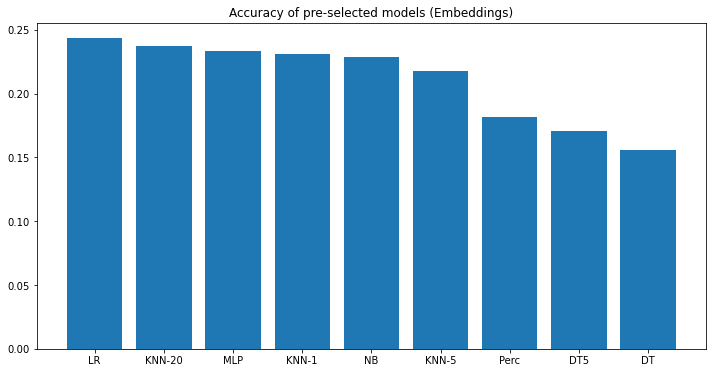

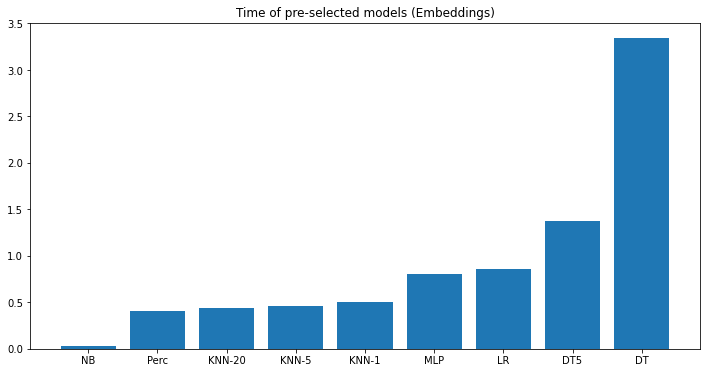

In [25]:
plot_by_models(sort_basic_models_embs_acc, "Accuracy of pre-selected models (Embeddings)")
plot_by_models(sort_basic_models_embs_time, "Time of pre-selected models (Embeddings)")

##### Feature 2: TFIDF

In [26]:
# return accuracy, time data
# of different models with feature TFIDF
def acc_tfidf_models(models):
    all_models_acc = {}
    all_models_time = {}
    for title, model in models:
        start = time.time()
        model.fit(train_labelled_tfidf, train_bin_label)
        acc = model.score(valid_tfidf, valid_bin_label)
        end = time.time()
        
        whole_time = end - start
        all_models_time[title] = whole_time
        all_models_acc[title] = acc
        print(title,":", acc, whole_time)

    return all_models_acc, all_models_time

In [27]:
basic_models_tfidf_acc, basic_models_tfidf_time = acc_tfidf_models(basic_models)

NB : 0.21991940126655152 0.04512381553649902
DT5 : 0.17674150834772595 0.18318605422973633
DT : 0.17443868739205526 0.8726179599761963
KNN-1 : 0.17731721358664365 0.5672309398651123
KNN-5 : 0.14680483592400692 0.5810489654541016
KNN-20 : 0.178468624064479 0.594688892364502
Perc : 0.16753022452504318 0.40012598037719727
LR : 0.2181922855497985 0.8325047492980957
MLP : 0.22682786413356362 1.182046890258789


In [28]:
# sort
sort_basic_models_tfidf_acc = dict(sorted(basic_models_tfidf_acc.items(), key=lambda item: item[1], reverse=True))
sort_basic_models_tfidf_time = dict(sorted(basic_models_tfidf_time.items(), key=lambda item: item[1]))

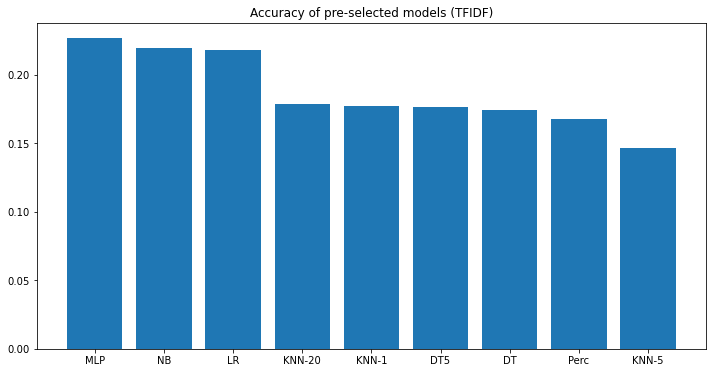

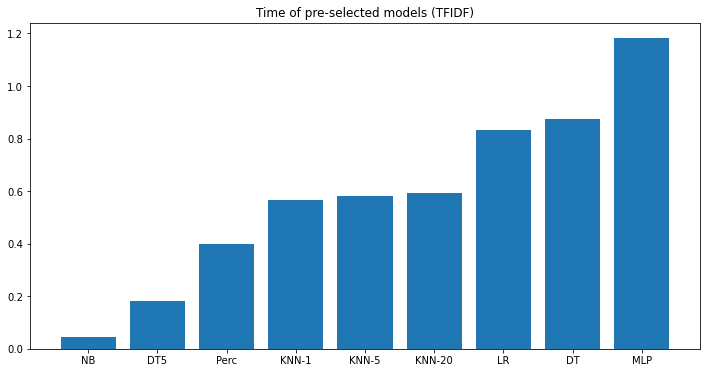

In [29]:
plot_by_models(sort_basic_models_tfidf_acc, "Accuracy of pre-selected models (TFIDF)")
plot_by_models(sort_basic_models_tfidf_time, "Time of pre-selected models (TFIDF)")

### Part 2 - Advanced Classifiers: BaggingClassifier, AdaBoostClassifier

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [31]:
# selected models in details
adv_models = [
    ("KNN-20", KNeighborsClassifier(n_neighbors=20)),
    ("Bag-KNN", BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=20), n_estimators=5, max_samples=0.3, random_state=0)),    ("LR", LogisticRegression(random_state=0, max_iter=800)),
    ("Bag-LR", BaggingClassifier(estimator=LogisticRegression(random_state=0, max_iter=800), n_estimators=5, max_samples=0.3, random_state=0)),
    ("Boost-LR", AdaBoostClassifier(estimator=LogisticRegression(random_state=0, max_iter=800), n_estimators=100, random_state=0))
]

##### Feature 1: Embeddings

In [32]:
# embeddings
adv_models_embs_acc, adv_models_embs_time = acc_embs_models(adv_models)
# sort
sort_adv_models_embs_acc = dict(sorted(adv_models_embs_acc.items(), key=lambda item: item[1], reverse=True))
sort_adv_models_embs_time = dict(sorted(adv_models_embs_time.items(), key=lambda item: item[1]))

KNN-20 : 0.2377662636729994 0.4867210388183594
Bag-KNN : 0.21876799078871617 0.808060884475708
LR : 0.24352331606217617 0.8935999870300293
Bag-LR : 0.24409902130109384 2.438277006149292
Boost-LR : 0.21531375935521013 5.16529107093811


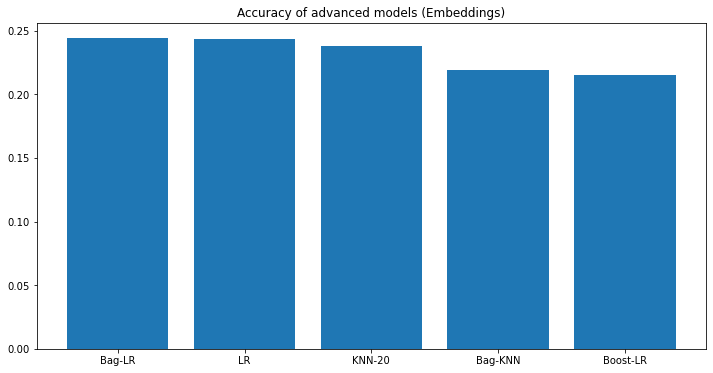

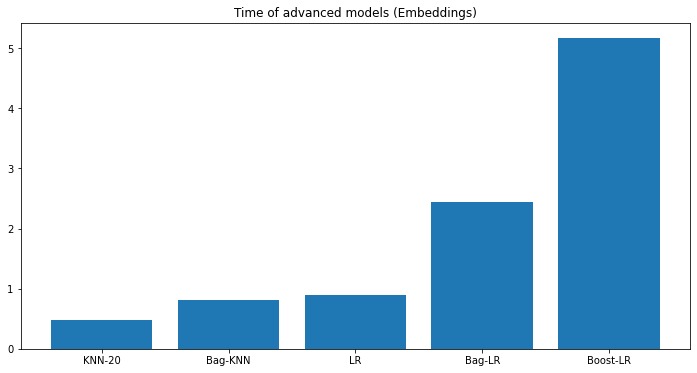

In [33]:
plot_by_models(sort_adv_models_embs_acc, "Accuracy of advanced models (Embeddings)")
plot_by_models(sort_adv_models_embs_time, "Time of advanced models (Embeddings)")

##### Feature 2: TFIDF

In [34]:
# TFIDF
adv_models_tfidf_acc, adv_models_tfidf_time = acc_tfidf_models(adv_models)
# sort
sort_adv_models_tfidf_acc = dict(sorted(adv_models_tfidf_acc.items(), key=lambda item: item[1], reverse=True))
sort_adv_models_tfidf_time = dict(sorted(adv_models_tfidf_time.items(), key=lambda item: item[1]))

KNN-20 : 0.178468624064479 0.6009359359741211
Bag-KNN : 0.2003454231433506 1.0017662048339844
LR : 0.2181922855497985 0.9192850589752197
Bag-LR : 0.21301093839953944 2.4770119190216064
Boost-LR : 0.19746689694876224 5.258134126663208


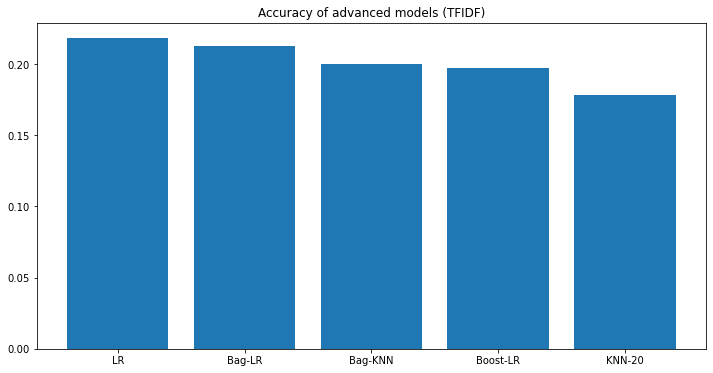

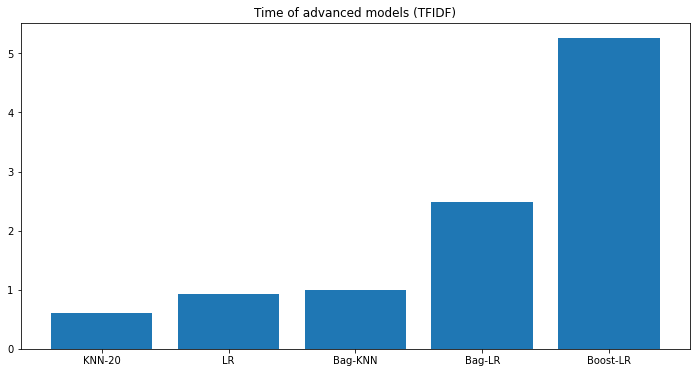

In [35]:
plot_by_models(sort_adv_models_tfidf_acc, "Accuracy of advanced models (TFIDF)")
plot_by_models(sort_adv_models_tfidf_time, "Time of advanced models (TFIDF)")

## Step 5: Feature Selection - Embeddings & TFIDF

### Part 1 - Accurcy Comparison

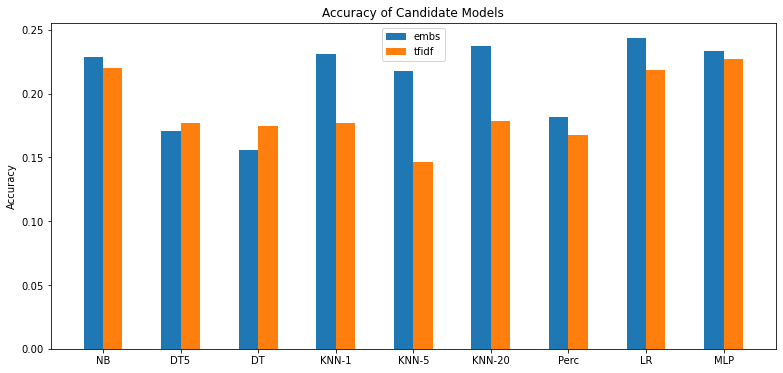

In [36]:
# accuracy plot comparison
plt.figure(figsize=(13, 6))

labels = list(map(lambda m: m[0], basic_models))
embs = list(basic_models_embs_acc.values())
tfidf = list(basic_models_tfidf_acc.values())

x = np.arange(len(labels))
width = 0.25
plt.bar(x - width/2, embs, width, label='embs')
plt.bar(x + width/2, tfidf, width, label='tfidf')
plt.ylabel('Accuracy')
plt.title('Accuracy of Candidate Models')

plt.xticks(x, labels=labels)
plt.legend()
plt.show()

### Part 2 - Time Complexity Comparison

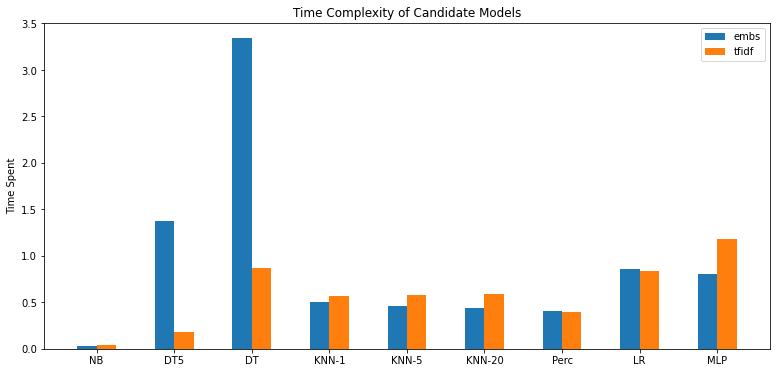

In [37]:
# time plot comparison
plt.figure(figsize=(13, 6))

labels = list(map(lambda m: m[0], basic_models))
embs = list(basic_models_embs_time.values())
tfidf = list(basic_models_tfidf_time.values())

x = np.arange(len(labels))
width = 0.25
plt.bar(x - width/2, embs, width, label='embs')
plt.bar(x + width/2, tfidf, width, label='tfidf')
plt.ylabel('Time Spent')
plt.title('Time Complexity of Candidate Models')

plt.xticks(x, labels=labels)
plt.legend()
plt.show()

## Step 6: Parameter Tuning

### Model 1 - KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

### Parameter 1: number of neighbours

In [39]:
knn_k_models = []
for k in range(0, 31, 5):
    if k == 0: k=k+1
    model = KNeighborsClassifier(n_neighbors=k)
    title = "KNN-" + str(k)
    knn_k_models.append((title, model))

In [40]:
# embeddings
knn_k_models_embs_acc, knn_k_models_embs_time = acc_embs_models(knn_k_models)

KNN-1 : 0.231433506044905 0.5000488758087158
KNN-5 : 0.21761658031088082 0.5022270679473877
KNN-10 : 0.22625215889464595 0.49863600730895996
KNN-15 : 0.2251007484168106 0.5122740268707275
KNN-20 : 0.2377662636729994 0.5105531215667725
KNN-25 : 0.2337363270005757 0.5113890171051025
KNN-30 : 0.22855497985031664 0.5099220275878906


In [41]:
# tfidf
knn_k_models_tfidf_acc, knn_k_models_tfidf_time = acc_tfidf_models(knn_k_models)

KNN-1 : 0.17731721358664365 0.5854902267456055
KNN-5 : 0.14680483592400692 0.5899031162261963
KNN-10 : 0.15313759355210133 0.5966181755065918
KNN-15 : 0.18998272884283246 0.6098480224609375
KNN-20 : 0.178468624064479 0.6089441776275635
KNN-25 : 0.1911341393206678 0.6211028099060059
KNN-30 : 0.2026482440990213 0.61788010597229


In [42]:
import matplotlib.pyplot as plt
def plot_line_by_models_both_feat(data_embs, data_tfidf, title, width=10, height=4):
    x = list(data_embs.keys())
    y1 = data_embs.values()
    y2 = data_tfidf.values()
    plt.figure(figsize=(width,height))

    plt.plot(x, y1, 'r')
    plt.plot(x, y2, 'b')
    plt.title(title)
    plt.legend(['Embeddings', 'TFIDF'])
    plt.show()

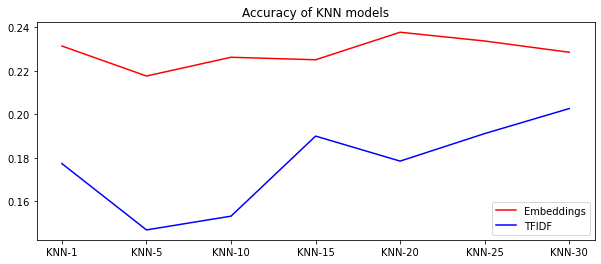

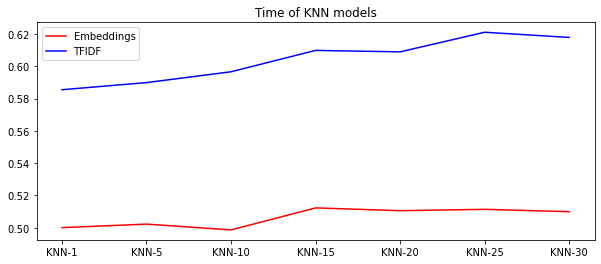

In [43]:
plot_line_by_models_both_feat(knn_k_models_embs_acc,knn_k_models_tfidf_acc, "Accuracy of KNN models")
plot_line_by_models_both_feat(knn_k_models_embs_time, knn_k_models_tfidf_time, "Time of KNN models")

In [44]:
# k = 15-20
knn_k_models = []
for k in range(15, 26):
    model = KNeighborsClassifier(n_neighbors=k)
    title = "KNN-" + str(k)
    knn_k_models.append((title, model))
knn_k_models

[('KNN-15', KNeighborsClassifier(n_neighbors=15)),
 ('KNN-16', KNeighborsClassifier(n_neighbors=16)),
 ('KNN-17', KNeighborsClassifier(n_neighbors=17)),
 ('KNN-18', KNeighborsClassifier(n_neighbors=18)),
 ('KNN-19', KNeighborsClassifier(n_neighbors=19)),
 ('KNN-20', KNeighborsClassifier(n_neighbors=20)),
 ('KNN-21', KNeighborsClassifier(n_neighbors=21)),
 ('KNN-22', KNeighborsClassifier(n_neighbors=22)),
 ('KNN-23', KNeighborsClassifier(n_neighbors=23)),
 ('KNN-24', KNeighborsClassifier(n_neighbors=24)),
 ('KNN-25', KNeighborsClassifier(n_neighbors=25))]

In [45]:
# embeddings
knn_k_models_embs_acc, knn_k_models_embs_time = acc_embs_models(knn_k_models)

KNN-15 : 0.2251007484168106 0.47414708137512207
KNN-16 : 0.229706390328152 0.4808039665222168
KNN-17 : 0.22682786413356362 0.48774099349975586
KNN-18 : 0.23200921128382268 0.4874298572540283
KNN-19 : 0.23719055843408174 0.48509812355041504
KNN-20 : 0.2377662636729994 0.4754340648651123
KNN-21 : 0.23200921128382268 0.4867520332336426
KNN-22 : 0.22855497985031664 0.47930312156677246
KNN-23 : 0.22855497985031664 0.4706418514251709
KNN-24 : 0.229706390328152 0.4838447570800781
KNN-25 : 0.2337363270005757 0.48012375831604004


In [46]:
# tfidf
knn_k_models_tfidf_acc, knn_k_models_tfidf_time = acc_tfidf_models(knn_k_models)

KNN-15 : 0.18998272884283246 0.5412998199462891
KNN-16 : 0.18595279217040875 0.5578098297119141
KNN-17 : 0.1888313183649971 0.5528969764709473
KNN-18 : 0.18364997121473806 0.5596320629119873
KNN-19 : 0.17731721358664365 0.5606648921966553
KNN-20 : 0.178468624064479 0.5577948093414307
KNN-21 : 0.18422567645365573 0.5544791221618652
KNN-22 : 0.18767990788716177 0.5593478679656982
KNN-23 : 0.18767990788716177 0.5553970336914062
KNN-24 : 0.1963154864709269 0.5604002475738525
KNN-25 : 0.1911341393206678 0.5767409801483154


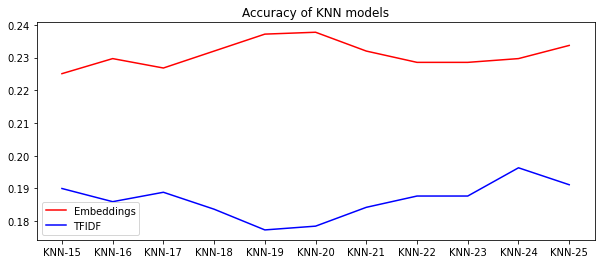

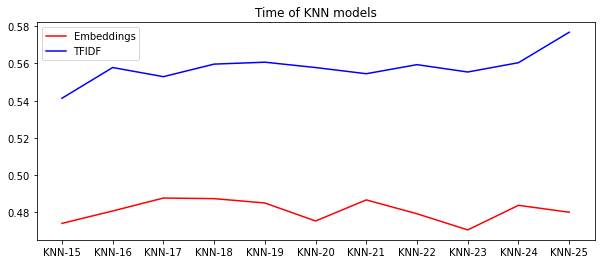

In [47]:
plot_line_by_models_both_feat(knn_k_models_embs_acc,knn_k_models_tfidf_acc, "Accuracy of KNN models")
plot_line_by_models_both_feat(knn_k_models_embs_time, knn_k_models_tfidf_time, "Time of KNN models")

### Parameter 2: distance (k=5)

In [48]:
knn_dist_models = []
distances = ['euclidean', 'manhattan', 'cosine', 'jaccard', 'hamming']
for d in distances:
    model = KNeighborsClassifier(metric=d)
    title = "KNN-" + d
    knn_dist_models.append((title, model))

In [49]:
# embeddings
knn_dist_models_embs_acc, knn_dist_models_embs_time = acc_embs_models(knn_dist_models)

KNN-euclidean : 0.21761658031088082 0.4680018424987793
KNN-manhattan : 0.22279792746113988 0.8923478126525879
KNN-cosine : 0.21761658031088082 0.297605037689209


/Users/judym./opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


KNN-jaccard : 0.10362694300518134 4.414397954940796
KNN-hamming : 0.11053540587219343 4.820637941360474


In [50]:
# tfidf
knn_dist_models_tfidf_acc, knn_dist_models_tfidf_time = acc_tfidf_models(knn_dist_models)

KNN-euclidean : 0.14680483592400692 0.5932159423828125
KNN-manhattan : 0.12492803684513529 1.13307785987854
KNN-cosine : 0.18422567645365573 0.3265211582183838


/Users/judym./opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


KNN-jaccard : 0.21531375935521013 5.7719199657440186
KNN-hamming : 0.11226252158894647 11.940345048904419


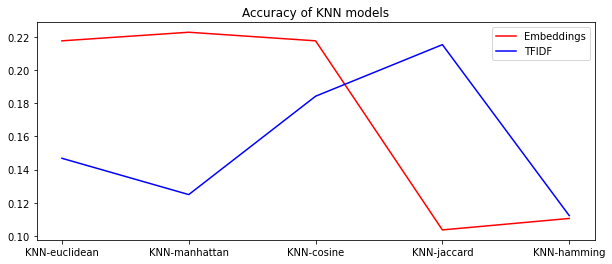

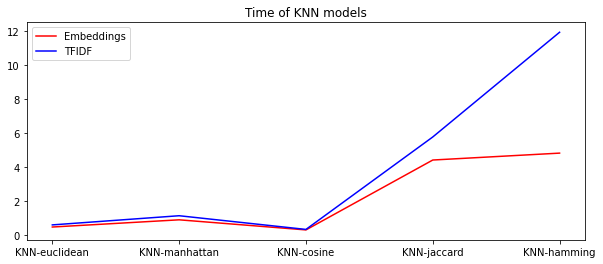

In [51]:
plot_line_by_models_both_feat(knn_dist_models_embs_acc,knn_dist_models_tfidf_acc, "Accuracy of KNN models")
plot_line_by_models_both_feat(knn_dist_models_embs_time, knn_dist_models_tfidf_time, "Time of KNN models")

### Model 2 - Logistics Regression

In [52]:
from sklearn.linear_model import LogisticRegression

### Parameter 1: class_weight

In [53]:
lr_models = [
    ('LR-default', LogisticRegression(random_state=0, max_iter=800)),
    ('LR-class-weighted', LogisticRegression(random_state=0, max_iter=800, class_weight="balanced"))
]

In [54]:
# embeddings
lr_models_embs_acc, lr_models_embs_time = acc_embs_models(lr_models)

LR-default : 0.24352331606217617 0.8230187892913818
LR-class-weighted : 0.23949337938975246 0.7941610813140869


In [55]:
# tfidf
lr_models_tfidf_acc, lr_models_tfidf_time = acc_tfidf_models(lr_models)

LR-default : 0.2181922855497985 0.8453118801116943
LR-class-weighted : 0.21876799078871617 0.793999195098877


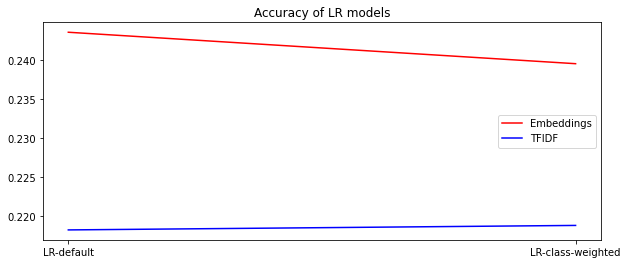

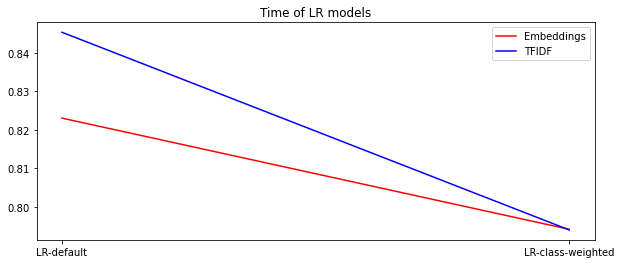

In [56]:
plot_line_by_models_both_feat(lr_models_embs_acc,lr_models_tfidf_acc, "Accuracy of LR models")
plot_line_by_models_both_feat(lr_models_embs_time, lr_models_tfidf_time, "Time of LR models")

### Parameter 2: solvers

In [57]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
lr_solver_models = []
for s in solvers:
    model = LogisticRegression(random_state=0, max_iter=800, solver=s)
    title = "LR-" + s
    lr_solver_models.append((title, model))
lr_solver_models

[('LR-lbfgs', LogisticRegression(max_iter=800, random_state=0)),
 ('LR-liblinear',
  LogisticRegression(max_iter=800, random_state=0, solver='liblinear')),
 ('LR-newton-cg',
  LogisticRegression(max_iter=800, random_state=0, solver='newton-cg')),
 ('LR-sag', LogisticRegression(max_iter=800, random_state=0, solver='sag')),
 ('LR-saga', LogisticRegression(max_iter=800, random_state=0, solver='saga'))]

In [58]:
# embeddings
lr_solver_models_embs_acc, lr_solver_models_embs_time = acc_embs_models(lr_solver_models)

LR-lbfgs : 0.24352331606217617 0.7950379848480225
LR-liblinear : 0.24179620034542315 3.1530978679656982


/Users/judym./opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/judym./opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LR-newton-cg : 0.24352331606217617 0.7701230049133301
LR-sag : 0.24352331606217617 2.07637095451355
LR-saga : 0.24352331606217617 1.8945181369781494


In [59]:
# tfidf
lr_solver_models_tfidf_acc, lr_solver_models_tfidf_time = acc_tfidf_models(lr_solver_models)

LR-lbfgs : 0.2181922855497985 0.8448913097381592
LR-liblinear : 0.21934369602763384 0.24380993843078613
LR-newton-cg : 0.2181922855497985 0.8009748458862305
LR-sag : 0.2181922855497985 3.3301029205322266
LR-saga : 0.2181922855497985 2.793787956237793


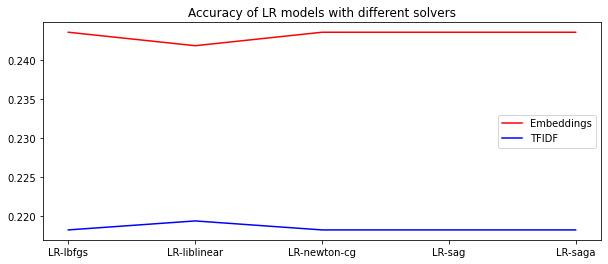

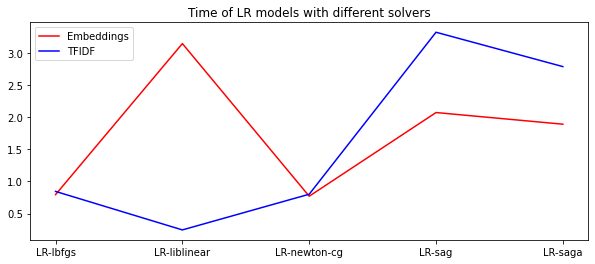

In [60]:
plot_line_by_models_both_feat(lr_solver_models_embs_acc,lr_solver_models_tfidf_acc, "Accuracy of LR models with different solvers")
plot_line_by_models_both_feat(lr_solver_models_embs_time, lr_solver_models_tfidf_time, "Time of LR models with different solvers")

### Parameter 3:  multi_class

In [61]:
lr_class_models = [
    ('LR-ovr', LogisticRegression(random_state=0, max_iter=800, multi_class="ovr")),
    ('LR-multinomial', LogisticRegression(random_state=0, max_iter=800, multi_class="multinomial"))
]

In [62]:
# embeddings
lr_class_models_embs_acc, lr_class_models_embs_time = acc_embs_models(lr_class_models)

LR-ovr : 0.24179620034542315 0.97257399559021
LR-multinomial : 0.24352331606217617 0.8045220375061035


In [63]:
# tfidf
lr_class_models_tfidf_acc, lr_class_models_tfidf_time = acc_tfidf_models(lr_class_models)

LR-ovr : 0.21991940126655152 1.0062079429626465
LR-multinomial : 0.2181922855497985 0.8226077556610107


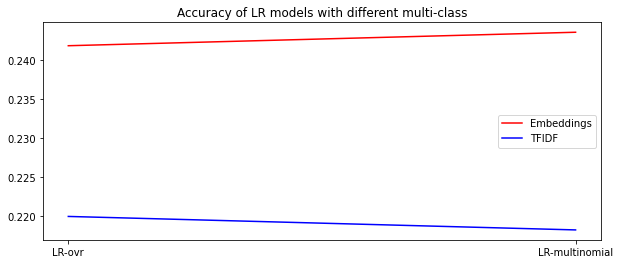

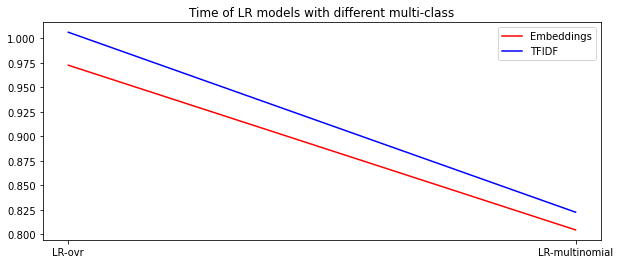

In [64]:
plot_line_by_models_both_feat(lr_class_models_embs_acc,lr_class_models_tfidf_acc, "Accuracy of LR models with different multi-class")
plot_line_by_models_both_feat(lr_class_models_embs_time, lr_class_models_tfidf_time, "Time of LR models with different multi-class")

### Parameter 4: penalty 

In [65]:
lr_penalty_models = [
    ('LR-l1', LogisticRegression(random_state=0, max_iter=800, multi_class="multinomial", penalty="l1", solver="saga")),
    ('LR-l2', LogisticRegression(random_state=0, max_iter=800, multi_class="multinomial", penalty="l2", solver="saga"))
]

In [66]:
# embeddings
lr_penalty_models_embs_acc, lr_penalty_models_embs_time = acc_embs_models(lr_penalty_models)

LR-l1 : 0.22855497985031664 5.6034770011901855
LR-l2 : 0.24352331606217617 1.8868579864501953


In [67]:
# tfidf
lr_penalty_models_tfidf_acc, lr_penalty_models_tfidf_time = acc_tfidf_models(lr_penalty_models)

LR-l1 : 0.22567645365572828 5.117850065231323
LR-l2 : 0.2181922855497985 2.797869920730591


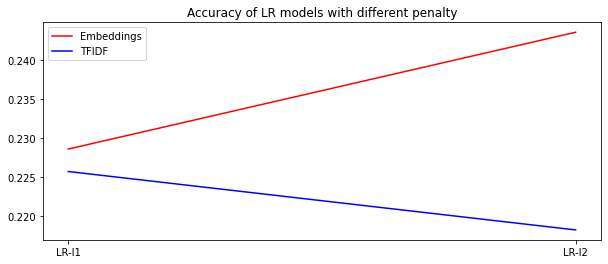

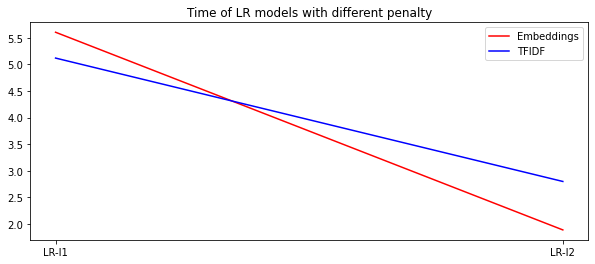

In [68]:
plot_line_by_models_both_feat(lr_penalty_models_embs_acc,lr_penalty_models_tfidf_acc, "Accuracy of LR models with different penalty")
plot_line_by_models_both_feat(lr_penalty_models_embs_time, lr_penalty_models_tfidf_time, "Time of LR models with different penalty")

### Parameter 5: C - Inverse of regularization strength 

In [69]:
c_list = np.arange(0.05, 1.01, 0.05)
lr_c_models = []
for c in c_list:
    c = round(c, 2)
    model = LogisticRegression(random_state=0, max_iter=800, solver='lbfgs', multi_class="multinomial", C=c)
    title = "LR-C-" + str(c)
    lr_c_models.append((title, model))
lr_c_models

[('LR-C-0.05',
  LogisticRegression(C=0.05, max_iter=800, multi_class='multinomial',
                     random_state=0)),
 ('LR-C-0.1',
  LogisticRegression(C=0.1, max_iter=800, multi_class='multinomial',
                     random_state=0)),
 ('LR-C-0.15',
  LogisticRegression(C=0.15, max_iter=800, multi_class='multinomial',
                     random_state=0)),
 ('LR-C-0.2',
  LogisticRegression(C=0.2, max_iter=800, multi_class='multinomial',
                     random_state=0)),
 ('LR-C-0.25',
  LogisticRegression(C=0.25, max_iter=800, multi_class='multinomial',
                     random_state=0)),
 ('LR-C-0.3',
  LogisticRegression(C=0.3, max_iter=800, multi_class='multinomial',
                     random_state=0)),
 ('LR-C-0.35',
  LogisticRegression(C=0.35, max_iter=800, multi_class='multinomial',
                     random_state=0)),
 ('LR-C-0.4',
  LogisticRegression(C=0.4, max_iter=800, multi_class='multinomial',
                     random_state=0)),
 ('LR-C-0.45',
 

In [70]:
# embeddings
lr_c_models_embs_acc, lr_c_models_embs_time = acc_embs_models(lr_c_models)

LR-C-0.05 : 0.23661485319516407 0.1975421905517578
LR-C-0.1 : 0.2377662636729994 0.2834129333496094
LR-C-0.15 : 0.23891767415083479 0.3989832401275635
LR-C-0.2 : 0.24006908462867013 0.41645097732543945
LR-C-0.25 : 0.23834196891191708 0.44834208488464355
LR-C-0.3 : 0.2406447898675878 0.49143314361572266
LR-C-0.35 : 0.23949337938975246 0.5383880138397217
LR-C-0.4 : 0.23949337938975246 0.5748322010040283
LR-C-0.45 : 0.24122049510650548 0.5348889827728271
LR-C-0.5 : 0.24179620034542315 0.6168038845062256
LR-C-0.55 : 0.24582613701784686 0.6057779788970947
LR-C-0.6 : 0.24409902130109384 0.7417821884155273
LR-C-0.65 : 0.24467472654001152 0.6947839260101318
LR-C-0.7 : 0.24352331606217617 0.7198541164398193
LR-C-0.75 : 0.24582613701784686 0.71956467628479
LR-C-0.8 : 0.2452504317789292 0.6936788558959961
LR-C-0.85 : 0.24467472654001152 0.7674992084503174
LR-C-0.9 : 0.24409902130109384 0.7652528285980225
LR-C-0.95 : 0.24352331606217617 0.8261950016021729
LR-C-1.0 : 0.24352331606217617 0.787162065

In [71]:
# tfidf
lr_c_models_tfidf_acc, lr_c_models_tfidf_time = acc_tfidf_models(lr_c_models)

LR-C-0.05 : 0.2274035693724813 0.20151901245117188
LR-C-0.1 : 0.22797927461139897 0.2783989906311035
LR-C-0.15 : 0.22567645365572828 0.36243486404418945
LR-C-0.2 : 0.2204951065054692 0.4176061153411865
LR-C-0.25 : 0.21646516983304548 0.4573681354522705
LR-C-0.3 : 0.21301093839953944 0.5209407806396484
LR-C-0.35 : 0.2158894645941278 0.490217924118042
LR-C-0.4 : 0.2181922855497985 0.5594360828399658
LR-C-0.45 : 0.2204951065054692 0.5750010013580322
LR-C-0.5 : 0.2181922855497985 0.58583664894104
LR-C-0.55 : 0.21761658031088082 0.5917329788208008
LR-C-0.6 : 0.21991940126655152 0.7113521099090576
LR-C-0.65 : 0.21761658031088082 0.6808509826660156
LR-C-0.7 : 0.21704087507196315 0.6821997165679932
LR-C-0.75 : 0.21991940126655152 0.7096529006958008
LR-C-0.8 : 0.21934369602763384 0.6971619129180908
LR-C-0.85 : 0.21876799078871617 0.7328958511352539
LR-C-0.9 : 0.2181922855497985 0.7665388584136963
LR-C-0.95 : 0.2181922855497985 0.8387768268585205
LR-C-1.0 : 0.2181922855497985 0.823958158493042


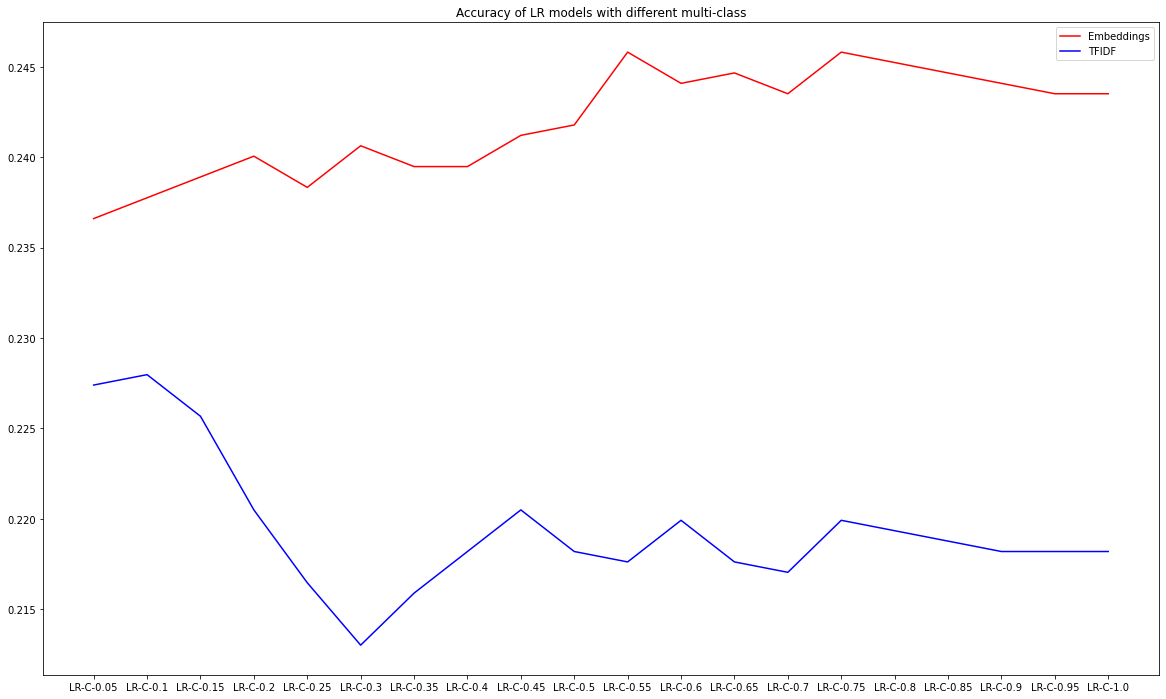

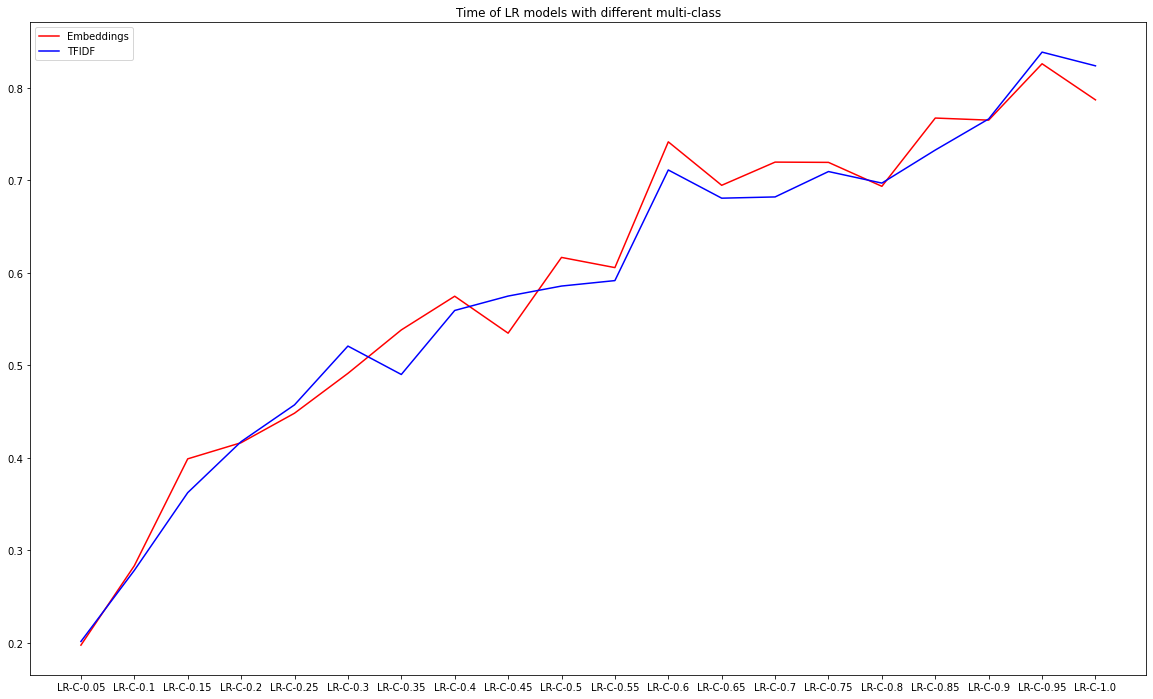

In [72]:
plot_line_by_models_both_feat(lr_c_models_embs_acc,lr_c_models_tfidf_acc, "Accuracy of LR models with different multi-class",width=20, height=12)
plot_line_by_models_both_feat(lr_c_models_embs_time, lr_c_models_tfidf_time, "Time of LR models with different multi-class",width=20, height=12)

### Compare Models with Best Performance

In [73]:
best_models = [
    ('LR', LogisticRegression(C=0.55, max_iter=800, multi_class='multinomial',
                     random_state=0)),
    ("KNN-20-manhattan", KNeighborsClassifier(n_neighbors=20, metric="manhattan")),
    ("KNN-30-jaccard", KNeighborsClassifier(n_neighbors=30, metric="jaccard"))
]

In [74]:
# embeddings
best_models_embs_acc, best_models_embs_time = acc_embs_models(best_models)

LR : 0.24582613701784686 0.6174211502075195
KNN-20-manhattan : 0.22337363270005758 0.8685507774353027


/Users/judym./opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


KNN-30-jaccard : 0.102475532527346 4.3632659912109375


In [75]:
# tfidf
best_models_tfidf_acc, best_models_tfidf_time = acc_tfidf_models(best_models)

LR : 0.21761658031088082 0.6204929351806641
KNN-20-manhattan : 0.15313759355210133 1.1361820697784424


/Users/judym./opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


KNN-30-jaccard : 0.24352331606217617 5.767254114151001


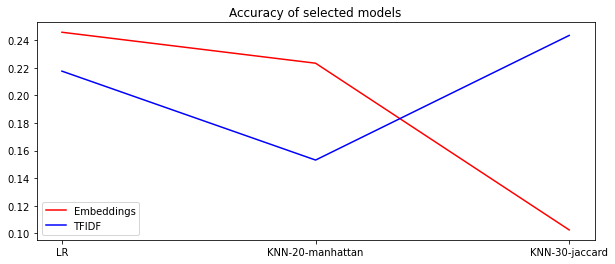

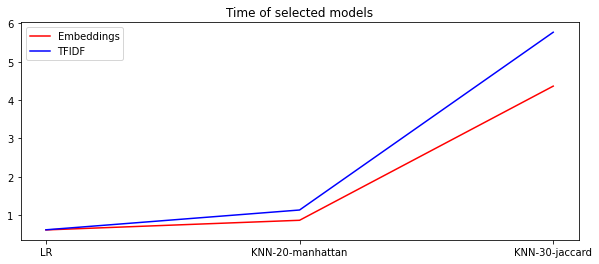

In [76]:
plot_line_by_models_both_feat(best_models_embs_acc,best_models_tfidf_acc, "Accuracy of selected models")
plot_line_by_models_both_feat(best_models_embs_time, best_models_tfidf_time, "Time of selected models")

## Step 7: Semi-supervised Learning

In [77]:
import matplotlib.pyplot as plt
def plot_line_by_semi_threshold(data_semi, data_base, title):
    x = list(data_semi.keys())
    y1 = data_semi.values()
    y2 = data_base.values()
    plt.figure(figsize=(10,4))

    plt.plot(x, y1, 'r')
    plt.plot(x, y2, 'b')
    plt.title(title)
    plt.legend(['Semi Model', 'Base Model'])
    plt.show()

In [78]:
from sklearn.semi_supervised import SelfTrainingClassifier

def semi_learning_embs(base_model, thresholds):
    semi_embs_acc = {}
    labelled_embs_acc = {}
    for t in thresholds:
        self_training_model = SelfTrainingClassifier(base_model, threshold=t)
        train_bin_unlabel = pd.Series([-1]* (train_data.shape[0] - train_bin_label.shape[0]))
        semi_bin_label = pd.concat([train_bin_label, train_bin_unlabel]).reset_index(drop=True)

        # semi-model
        self_training_model.fit(train_embs ,semi_bin_label)
        semi_acc = self_training_model.score(valid_embs, valid_bin_label)
        semi_embs_acc[t] = semi_acc
        print("Threshold -", t,"semi accuracy:", semi_acc)
        
        # base-model
        base_model.fit(train_labelled_embs, train_bin_label)
        labelled_acc = base_model.score(valid_embs, valid_bin_label)
        labelled_embs_acc[t] = labelled_acc
        
    return semi_embs_acc, labelled_embs_acc

In [79]:
def semi_learning_tfidf(base_model, thresholds):
    semi_tfidf_acc = {}
    labelled_tfidf_acc = {}
    for t in thresholds:
        self_training_model = SelfTrainingClassifier(base_model, threshold=t)
        train_bin_unlabel = pd.Series([-1]* (train_data.shape[0] - train_bin_label.shape[0]))
        semi_bin_label = pd.concat([train_bin_label, train_bin_unlabel]).reset_index(drop=True)

        # semi-model
        self_training_model.fit(train_tfidf ,semi_bin_label)
        semi_acc = self_training_model.score(valid_tfidf, valid_bin_label)
        semi_tfidf_acc[t] = semi_acc
        print("Threshold -", t,"semi accuracy:", semi_acc)
        
        # base-model
        base_model.fit(train_labelled_tfidf, train_bin_label)
        labelled_acc = base_model.score(valid_tfidf, valid_bin_label)
        labelled_tfidf_acc[t] = labelled_acc
        
    return semi_tfidf_acc, labelled_tfidf_acc

#### Base Model 1 - Logistic Regression

In [80]:
lr = LogisticRegression(C=0.55, max_iter=800, multi_class='multinomial', random_state=0)
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

Threshold - 0.1 semi accuracy: 0.23028209556706966
Threshold - 0.2 semi accuracy: 0.2274035693724813
Threshold - 0.3 semi accuracy: 0.22797927461139897
Threshold - 0.4 semi accuracy: 0.24179620034542315
Threshold - 0.5 semi accuracy: 0.24640184225676454
Threshold - 0.6 semi accuracy: 0.2429476108232585
Threshold - 0.7 semi accuracy: 0.24352331606217617
Threshold - 0.8 semi accuracy: 0.2452504317789292
Threshold - 0.9 semi accuracy: 0.24582613701784686


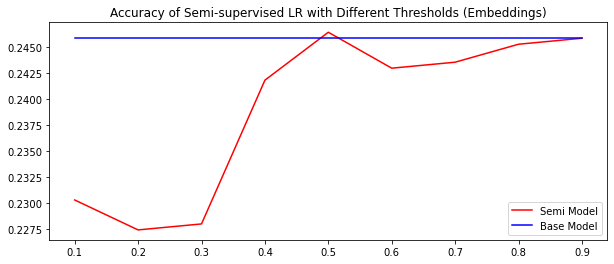

In [81]:
# embeddings
lr_semi_embs_acc, lr_labelled_embs_acc = semi_learning_embs(lr, thresholds)
plot_line_by_semi_threshold(lr_semi_embs_acc,lr_labelled_embs_acc, "Accuracy of Semi-supervised LR with Different Thresholds (Embeddings)")

Threshold - 0.1 semi accuracy: 0.21991940126655152
Threshold - 0.2 semi accuracy: 0.21761658031088082
Threshold - 0.3 semi accuracy: 0.21761658031088082
Threshold - 0.4 semi accuracy: 0.2222222222222222
Threshold - 0.5 semi accuracy: 0.21761658031088082
Threshold - 0.6 semi accuracy: 0.21646516983304548
Threshold - 0.7 semi accuracy: 0.21876799078871617
Threshold - 0.8 semi accuracy: 0.21761658031088082
Threshold - 0.9 semi accuracy: 0.21761658031088082


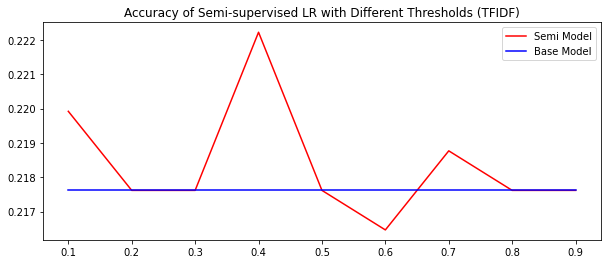

In [82]:
# tfidf
lr_semi_tfidf_acc, lr_labelled_tfidf_acc = semi_learning_tfidf(lr, thresholds)
plot_line_by_semi_threshold(lr_semi_tfidf_acc,lr_labelled_tfidf_acc, "Accuracy of Semi-supervised LR with Different Thresholds (TFIDF)")

#### Base Model 2 - KNN (K=20, Manhattan Distance)

In [83]:
knn = KNeighborsClassifier(n_neighbors=20, metric="manhattan")
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

Threshold - 0.1 semi accuracy: 0.22567645365572828
Threshold - 0.2 semi accuracy: 0.22394933793897526
Threshold - 0.3 semi accuracy: 0.21473805411629246
Threshold - 0.4 semi accuracy: 0.22625215889464595
Threshold - 0.5 semi accuracy: 0.22567645365572828
Threshold - 0.6 semi accuracy: 0.22394933793897526
Threshold - 0.7 semi accuracy: 0.22452504317789293
Threshold - 0.8 semi accuracy: 0.22394933793897526
Threshold - 0.9 semi accuracy: 0.22394933793897526


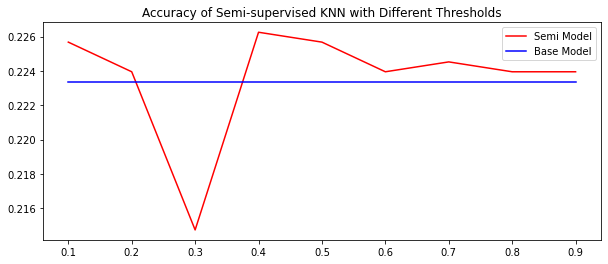

In [84]:
# embeddings
knn_semi_embs_acc, knn_labelled_embs_acc = semi_learning_embs(knn, thresholds)
plot_line_by_semi_threshold(knn_semi_embs_acc,knn_labelled_embs_acc, "Accuracy of Semi-supervised KNN with Different Thresholds")

Threshold - 0.1 semi accuracy: 0.10880829015544041
Threshold - 0.2 semi accuracy: 0.10823258491652274
Threshold - 0.3 semi accuracy: 0.14853195164075994
Threshold - 0.4 semi accuracy: 0.153713298791019
Threshold - 0.5 semi accuracy: 0.15313759355210133
Threshold - 0.6 semi accuracy: 0.15313759355210133
Threshold - 0.7 semi accuracy: 0.15313759355210133
Threshold - 0.8 semi accuracy: 0.15313759355210133
Threshold - 0.9 semi accuracy: 0.15313759355210133


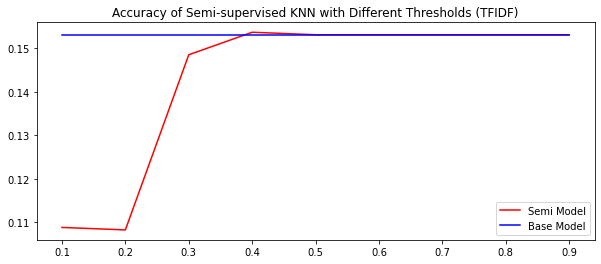

In [85]:
# tfidf
knn_semi_tfidf_acc, knn_labelled_tfidf_acc = semi_learning_tfidf(knn, thresholds)
plot_line_by_semi_threshold(knn_semi_tfidf_acc,knn_labelled_tfidf_acc, "Accuracy of Semi-supervised KNN with Different Thresholds (TFIDF)")

## Step 8: Evaluation Metric

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [91]:
# acc of best model
lr.fit(train_labelled_embs, train_bin_label)
lr.score(valid_embs, valid_bin_label)

0.24582613701784686

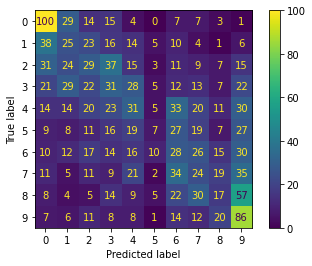

In [88]:
# Generate Confusion Matrix 
valid_pred = lr.predict(valid_tfidf)
ConfusionMatrixDisplay.from_predictions(valid_bin_label, valid_pred)

## Step 9: Kaggle

In [92]:
base = LogisticRegression(C=0.55, random_state=1, max_iter=800, multi_class="multinomial")
self_training_model = SelfTrainingClassifier(base, threshold=0.75)
train_bin_unlabel = pd.Series([-1]* (train_data.shape[0] - train_bin_label.shape[0]))
semi_bin_label = pd.concat([train_bin_label, train_bin_unlabel]).reset_index(drop=True)

# semi-model
self_training_model.fit(train_embs ,semi_bin_label)
semi_acc = self_training_model.score(valid_embs, valid_bin_label)


prediction = self_training_model.predict(test_embs)

kaggle = pd.DataFrame()
kaggle['job_id'] = test_data.job_id
kaggle['salary_bin'] = prediction
kagggle = kaggle.astype({'salary_bin': 'int'})

In [93]:
semi_acc

0.24409902130109384

In [98]:
final = LogisticRegression(C=0.55,random_state=1, max_iter=800, multi_class="multinomial")
final.fit(train_labelled_embs, train_bin_label)
acc = final.score(valid_embs, valid_bin_label)

prediction = final.predict(test_embs)

kaggle = pd.DataFrame()
kaggle['job_id'] = test_data.job_id
kaggle['salary_bin'] = prediction
kagggle = kaggle.astype({'salary_bin': 'int'})

In [99]:
acc

0.24582613701784686

In [100]:
kagggle

,job_id,salary_bin
0,JOB-2019-0016087,0
1,JOB-2019-0008055,9
2,JOB-2019-0001658,3
3,JOB-2019-0016777,7
4,JOB-2019-0017600,6
...,...,...
1733,JOB-2019-0008938,6
1734,JOB-2019-0016714,0
1735,JOB-2019-0017903,6
1736,JOB-2019-0008671,6


In [101]:
len(kagggle)

1738

In [ ]:
kagggle.to_csv("out3.csv",index=False)

In [ ]:
acc

### Helper Functions for Machine Learing Models: 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# helper function:

# train and evaluate models with embeddings feature in given models list
# print training time, accuracy and classification report
# return accuracy, training time data of each model
def train_embs_models(models):
    # initialize accuracy, training time data
    accuracy_data = {}
    training_data = {}
    for (name, model) in models:
        # train the model
        start = time.time()
        model.fit(train_labelled_embs, train_bin_label)
        end = time.time()
        training_time = end - start
        hours, rem = divmod(training_time, 3600)
        minutes, seconds = divmod(rem, 60)
        training_data[name] = training_time

        # generate classification report
        valid_pred = model.predict(valid_embs)
        report = classification_report(valid_bin_label, valid_pred)

        # calculate accuracy and add to accuracy data
        acc = model.score(valid_embs, valid_bin_label)
        accuracy_data[name] = acc

        # print training time, accuracy and classification report
        print("=================== ", name, "Report (Embeddings) ====================")
        print(report)
        print("Training Time: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
        print(name, "Model Accuracy:", acc, "\n")
    return accuracy_data, training_data


# train and evaluate models with tfidf feature in given models list
# print training time, accuracy and classification report
# return accuracy, training time data of each model
def train_tfidf_models(models):
    # initialize accuracy, training time data
    accuracy_data = {}
    training_data = {}
    for (name, model) in models:
        # train the model
        start = time.time()
        model.fit(train_labelled_tfidf, train_bin_label)
        end = time.time()
        training_time = end - start
        hours, rem = divmod(training_time, 3600)
        minutes, seconds = divmod(rem, 60)
        training_data[name] = training_time

        # generate classification report
        valid_pred = model.predict(valid_tfidf)
        report = classification_report(valid_bin_label, valid_pred)

        # calculate accuracy and add to accuracy data
        acc = model.score(valid_tfidf, valid_bin_label)
        accuracy_data[name] = acc

        # print training time, accuracy and classification report
        print("=================== ", name, "Report (TFIDF) ====================")
        print(report)
        print("Training Time: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
        print(name, "Model Accuracy:", acc, "\n")
    return accuracy_data, training_data

# train and evaluate models with both tfidf and embedding feature in given models list
# print training time, accuracy and classification report
# return accuracy, training time data of each model
def train_both_models(models):
    # initialize accuracy, training time data
    accuracy_data = {}
    training_data = {}
    for (name, model) in models:
        # train the model
        start = time.time()
        model.fit(train_labelled_embs_tfidf, train_bin_label)
        end = time.time()
        training_time = end - start
        hours, rem = divmod(training_time, 3600)
        minutes, seconds = divmod(rem, 60)
        training_data[name] = training_time

        # generate classification report
        valid_pred = model.predict(valid_embs_tfidf)
        report = classification_report(valid_bin_label, valid_pred)

        # calculate accuracy and add to accuracy data
        acc = model.score(valid_embs_tfidf, valid_bin_label)
        accuracy_data[name] = acc

        # print training time, accuracy and classification report
        print("=================== ", name, "Report (TFIDF & Embeddings) ====================")
        print(report)
        print("Training Time: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
        print(name, "Model Accuracy:", acc, "\n")
    return accuracy_data, training_data

# train and evaluate models with embeddings feature in given models list
# print training time, accuracy and classification report
# return accuracy, training time data of each model
def train_embs_pos_models(models):
    # initialize accuracy, training time data
    accuracy_data = {}
    training_data = {}
    for (name, model) in models:
        # train the model
        start = time.time()
        model.fit(train_labelled_embs_pos, train_bin_label)
        end = time.time()
        training_time = end - start
        hours, rem = divmod(training_time, 3600)
        minutes, seconds = divmod(rem, 60)
        training_data[name] = training_time

        # generate classification report
        valid_pred = model.predict(valid_embs_pos)
        report = classification_report(valid_bin_label, valid_pred)

        # calculate accuracy and add to accuracy data
        acc = model.score(valid_embs_pos, valid_bin_label)
        accuracy_data[name] = acc

        # print training time, accuracy and classification report
        print("=================== ", name, "Report (Embeddings) ====================")
        print(report)
        print("Training Time: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
        print(name, "Model Accuracy:", acc, "\n")
    return accuracy_data, training_data

# train and evaluate models with both tfidf and embedding feature in given models list
# print training time, accuracy and classification report
# return accuracy, training time data of each model
def train_both_pos_models(models):
    # initialize accuracy, training time data
    accuracy_data = {}
    training_data = {}
    for (name, model) in models:
        # train the model
        start = time.time()
        model.fit(train_labelled_embs_pos_tfidf, train_bin_label)
        end = time.time()
        training_time = end - start
        hours, rem = divmod(training_time, 3600)
        minutes, seconds = divmod(rem, 60)
        training_data[name] = training_time

        # generate classification report
        valid_pred = model.predict(valid_embs_pos_tfidf)
        report = classification_report(valid_bin_label, valid_pred)

        # calculate accuracy and add to accuracy data
        acc = model.score(valid_embs_pos_tfidf, valid_bin_label)
        accuracy_data[name] = acc

        # print training time, accuracy and classification report
        print("=================== ", name, "Report (TFIDF & Embeddings) ====================")
        print(report)
        print("Training Time: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
        print(name, "Model Accuracy:", acc, "\n")
    return accuracy_data, training_data

In [ ]:
def plot_by_features(data_list, xlabel, ylabel, title):
    fig, axs = plt.subplots(1, len(data_list), figsize=(9, 3), sharey=True)
    for i, data in enumerate(data_list):
        axs[i].plot(data.keys(), data.values())
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(ylabel)
    axs[0].set_title('Embeddings')
    axs[1].set_title('TFIDF')
    axs[2].set_title('Embeddings & TFIDF')
#     fig.suptitle(title, fontsize=16, linespacing=2)

### Model 1 - KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# list KNN models with different parameters
knn_models = [
    ("KNN-1", KNeighborsClassifier(n_neighbors=1)),
    ("KNN-5", KNeighborsClassifier(n_neighbors=5)),
    ("KNN-10", KNeighborsClassifier(n_neighbors=10)),
    ("KNN-20", KNeighborsClassifier(n_neighbors=20)),
]

In [ ]:
# train and evaluate each of the KNN models with embedding data
embs_accuracy_data, embs_training_time_data = train_embs_models(knn_models)

In [ ]:
# train and evaluate each of the KNN models with TFIDF data
tfidf_accuracy_data, tfidf_training_time_data = train_tfidf_models(knn_models)

In [ ]:
# train and evaluate each of the KNN models with embedding & TFIDF data
both_accuracy_data, both_training_time_data = train_both_models(knn_models)

In [ ]:
# plot accuracy data
accuracy_data_list = [embs_accuracy_data, tfidf_accuracy_data, both_accuracy_data]
plot_by_features(accuracy_data_list, "Number of Neighbours", "Accuracy", "Accuracy of KNN Models")

In [ ]:
# plot training time data
training_time_data_list = [embs_training_time_data, tfidf_training_time_data, both_training_time_data]
plot_by_features(training_time_data_list, "Number of Neighbours", "Training Time", "Training Time of KNN Models")

### Model 2 - Naive Bayes:

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [ ]:
# list Naive Bayes models with different parameters
nb_models = [
    ("Multinomial NB", MultinomialNB(alpha=0.1)),
    ("Gaussian NB", GaussianNB())
]

In [ ]:
embs_accuracy_data, embs_training_time_data = train_embs_pos_models(nb_models)

In [ ]:
tfidf_accuracy_data, tfidf_training_time_data = train_tfidf_models(nb_models)

In [ ]:
both_accuracy_data, both_training_time_data = train_both_pos_models(nb_models)

In [ ]:
# plot accuracy data
accuracy_data_list = [embs_accuracy_data, tfidf_accuracy_data, both_accuracy_data]
plot_by_features(accuracy_data_list, "Naive Beyes", "Accuracy", "Accuracy of Naive Beyes Models")

In [ ]:
# plot training time data
training_time_data_list = [embs_training_time_data, tfidf_training_time_data, both_training_time_data]
plot_by_features(training_time_data_list, "Naive Beyes", "Training Time", "Training Time of Naive Beyes Models")

### Model 3 - Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_models = [
    ("Logistic Regression - default", LogisticRegression(random_state=0, max_iter=140)),
    ("Logistic Regression - weighted", LogisticRegression(random_state=0, max_iter=140, class_weight="balanced")),
    ("Logistic Regression - Multinomial", LogisticRegression(random_state=0, multi_class="multinomial", max_iter=140))
]

In [ ]:
# train and evaluate each of the logistic regression models with embedding data
embs_accuracy_data, embs_training_time_data = train_embs_models(lr_models)

In [ ]:
# train and evaluate each of the logistic regression models with TFIDF data
tfidf_accuracy_data, tfidf_training_time_data = train_tfidf_models(lr_models)

In [ ]:
# train and evaluate each of the logistic regression models with embedding & TFIDF data
both_accuracy_data, both_training_time_data = train_both_models(lr_models)

In [ ]:
# plot accuracy data
accuracy_data_list = [embs_accuracy_data, tfidf_accuracy_data, both_accuracy_data]
plot_by_features(accuracy_data_list, "Models", "Accuracy", "Accuracy of Logistic Regression Models")

In [ ]:
# plot training time data
training_time_data_list = [embs_training_time_data, tfidf_training_time_data, both_training_time_data]
plot_by_features(training_time_data_list, "Models", "Training Time", "Training Time of Logistic Regression Models")

### Model 4 - MLP Classifier:

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_models = [
    ("MLP - default", MLPClassifier(random_state=0, max_iter=2000)),
    ("MLP - default", MLPClassifier(random_state=0, max_iter=2000))
]

In [ ]:
# train and evaluate each of the mlp models with embedding data
embs_accuracy_data, embs_training_time_data = train_embs_models(mlp_models)

In [ ]:
# train and evaluate each of the mlp models with TFIDF data
tfidf_accuracy_data, tfidf_training_time_data = train_tfidf_models(mlp_models)

In [ ]:
# train and evaluate each of the logistic regression models with embedding & TFIDF data
both_accuracy_data, both_training_time_data = train_both_models(mlp_models)

In [ ]:
# plot accuracy data
accuracy_data_list = [embs_accuracy_data, tfidf_accuracy_data, both_accuracy_data]
plot_by_features(accuracy_data_list, "Models", "Accuracy", "Accuracy of MLP Models")

In [ ]:
# plot training time data
training_time_data_list = [embs_training_time_data, tfidf_training_time_data, both_training_time_data]
plot_by_features(training_time_data_list, "Models", "Training Time", "Training Time of MLP Models")

In [ ]:
training_time_data_list